# Исследование расходов Яндекс.Афиши

## Цель исследования

Помочь маркетологам снизить расходы - отказаться от невыгодных источников трафика и перераспределить бюджет.

## Задача исследования

Требуется изучить:
* как клиенты пользуются сервисом,
* когда делают первые покупки на сайте,
* сколько денег приносит компании каждый клиент,
* когда расходы на привлечение клиента окупаются.

## Описание данных

В нашем распоряжении три датасета.

Файл `visits_log.csv` хранит лог сервера с информацией о посещениях сайта, `orders_log.csv` — информацию о заказах, а `costs.csv` — информацию о расходах на маркетинг.

**Структура** `visits_log.csv`
* `Uid` — уникальный идентификатор пользователя,
* `Device` — категория устройства пользователя,
* `Start Ts` — дата и время начала сессии,
* `End Ts` — дата и время окончания сессии,
* `Source Id` — идентификатор источника перехода на сайт.

**Структура** `orders_log.csv`
* `Uid` — уникальный идентификатор пользователя,
* `Buy Ts` — дата и время заказа,
* `Revenue` — сумма заказа.

**Структура** `costs.csv`
* `source_id` — идентификатор рекламного источника,
* `dt` — дата проведения рекламной кампании,
* `costs` — расходы на эту кампанию.

**Примечание**: 
Выручка измеряется в условных единицах — у.е.

## 0. Изучение общей информации

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import warnings 
from tqdm.notebook import tqdm

sns.set_theme(style="darkgrid")
# sns.set_palette("Greys_r")
warnings.simplefilter('ignore')
tqdm.pandas()

### Обзор данных

In [2]:
data = ['visits_log.csv', 'orders_log.csv', 'costs.csv']
path = open('link.txt', 'r').readline()

for file in data:
    try:
        response = requests.get(path + file)
        response.raise_for_status()
    except requests.exceptions.HTTPError:
        path = '/datasets/'

visits = pd.read_csv(path + data[0])
orders = pd.read_csv(path + data[1])
costs = pd.read_csv(path + data[2])

Для удобства вывода напишем вспомогательные функции:

In [3]:
def sep_text(text):
    """Функция для разделения текста hr"""
    return print(f'''
===============================================================
{text: ^64}
===============================================================
    ''')

In [4]:
def brows_data(data, name):
    """Отображение основных параметров - df, info, describe, dtypes"""
    data.name = name
    sep_text('DataFrame' + ': ' + name)
    display(data)
    sep_text('Info' + ': ' + name)
    display(data.info())
    sep_text('Describe' + ': ' + name)
    display(data.describe().T)
    sep_text('Dtypes' + ': ' + name)
    display(data.dtypes)

In [5]:
def test_func():
    """Это описание тестовой функции"""
test_func.__doc__

'Это описание тестовой функции'

Выведем краткую информацию о данных:

In [6]:
df_dict = {'visits':visits, 'orders':orders, 'costs':costs}
for name, df in tqdm(df_dict.items()):
    brows_data(df, name)

  0%|          | 0/3 [00:00<?, ?it/s]


                       DataFrame: visits                        
    


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485



                          Info: visits                          
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None


                        Describe: visits                        
    


,count,mean,std,min,25%,50%,75%,max
Source Id,359400.0,3.750515e+00,1.917116e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,1.000000e+01
Uid,359400.0,9.202557e+18,5.298433e+18,1.186350e+13,4.613407e+18,9.227413e+18,1.372824e+19,1.844668e+19



                         Dtypes: visits                         
    


Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object


                       DataFrame: orders                        
    


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247



                          Info: orders                          
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None


                        Describe: orders                        
    


,count,mean,std,min,25%,50%,75%,max
Revenue,50415.0,4.999647e+00,2.181836e+01,0.000000e+00,1.220000e+00,2.500000e+00,4.890000e+00,2.633280e+03
Uid,50415.0,9.098161e+18,5.285742e+18,3.135781e+14,4.533567e+18,9.102274e+18,1.368290e+19,1.844617e+19



                         Dtypes: orders                         
    


Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object


                        DataFrame: costs                        
    


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15



                          Info: costs                           
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None


                        Describe: costs                         
    


,count,mean,std,min,25%,50%,75%,max
source_id,2542.0,4.857199,3.181581,1.00,2.000,4.000,9.000,10.00
costs,2542.0,129.477427,156.296628,0.54,21.945,77.295,170.065,1788.28



                         Dtypes: costs                          
    


source_id      int64
dt            object
costs        float64
dtype: object

Проверим также данные на дубликаты:

In [7]:
for name, df in tqdm(df_dict.items()):
    print(f"Подсчет дубликатов в DataFrame {name}: {df.duplicated().sum()}")

  0%|          | 0/3 [00:00<?, ?it/s]

Подсчет дубликатов в DataFrame visits: 0
Подсчет дубликатов в DataFrame orders: 0
Подсчет дубликатов в DataFrame costs: 0


### Выводы

После обзора данных, можно сделать следующие выводы:
1. Пропусков в данных нет, что не может не радовать,
2. Выбросов тоже не было замечано,
3. Имена столбцов во всех таблицах было бы неплохо переименовать в нижний регистр и убрать пробелы между словами,
4. Столбцы с датой везде имеют тип данных `object` - нужно преобразовать к типу `datetime64`.
5. Дубликатов в данных нет - и это прекрасно :)

## 1. Подготовка данных

### Переименование столбцов

Переименуем название столбцов в нижний регистр и заменим пробел на символ _

In [8]:
for name, df in tqdm(df_dict.items()):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    print(f'{name} columns name = {df.columns}')

  0%|          | 0/3 [00:00<?, ?it/s]

visits columns name = Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
orders columns name = Index(['buy_ts', 'revenue', 'uid'], dtype='object')
costs columns name = Index(['source_id', 'dt', 'costs'], dtype='object')


### Получение даты

Приведем столбцы `end_ts, start_ts, buy_ts, dt` в таблицах `visits, orders, costs` к типу данных `datetime64`: 

In [9]:
date_columns = {'start_ts':visits, 'end_ts':visits, 'buy_ts':orders, 'dt':costs}
for column, df in tqdm(date_columns.items()):
    df[column] = pd.to_datetime(df[column])
print(visits.dtypes, orders.dtypes, costs.dtypes, end='\n')

  0%|          | 0/4 [00:00<?, ?it/s]

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


### Выводы

Исправили недочеты по именованию столбцов и типу данных у штампов времени.



## 2. Рассчет метрик и построение графиков

Выполним расчеты метрик по таким показателям как: продуктовые, электронной коммерции и маркетинговые.

### 2.1 Продуктовые метрики

2.1.1. Рассчитаем `DAU, WAU, MAU` и вычислим среднее значение метрик за весь период.

Выделим год, месяц, неделю и дату из столбца `start_ts` для подсчета метрик за разные периоды

In [10]:
visits['session_year']  = visits['start_ts'].dt.year

visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')

visits['session_date'] = visits['start_ts'].dt.date

Подсчитаем средние значения метрик `DAU, WAU, MAU` за соответствующий период:

In [11]:
visits_dau_mean = int(visits.groupby('session_date').agg({'uid':'nunique'}).mean())
print('Mean DAU-metric visits: ', visits_dau_mean)

visits_wau_mean = int(visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean())
print('Mean WAU-metric visits: ', visits_wau_mean)

visits_mau_mean = int(visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean())
print('Mean MAU-metric visits: ', visits_mau_mean)

Mean DAU-metric visits:  907
Mean WAU-metric visits:  5621
Mean MAU-metric visits:  23228


In [12]:
print('Mean WAU-metric visits: ', int(visits
                                      .query('session_week != "2018-05-31"')
                                      .groupby(['session_week'])
                                      .agg({'uid':'nunique'})
                                      .mean())
     )

Mean WAU-metric visits:  5796


Отобразим графики зависимости количества просмотров уникальных пользователей от периода. Отобразим на графиках черной линией раннее рассчитанные средние значения.

In [13]:
def draw_plot(data, column, meanline, xlabel, ylabel, title, group = True, agg = {'uid':'nunique'}, kind = 'line', figsize=(15,8)):
    if group:
        (data
        .groupby(column)
        .agg(agg)
        .plot(kind=kind, figsize=figsize)
        )
    else:
        ax = data[column].plot(kind=kind, figsize=figsize)
    
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.title(title, fontsize=18, fontweight=0, color='black')
    
    if meanline:
        plt.axhline(meanline, color = 'black', label='mean value')
    plt.legend()
    plt.show()

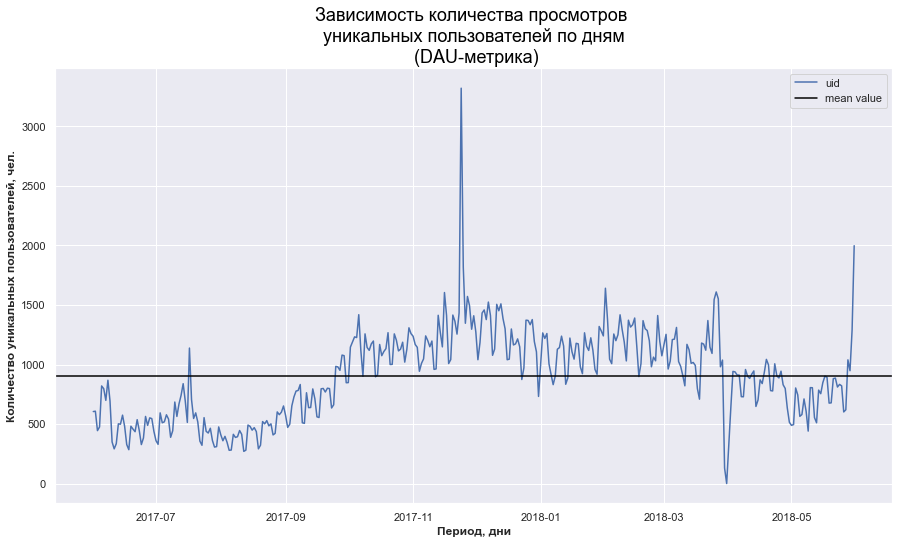

In [14]:
draw_plot(
    visits, 
    'session_date', 
    visits_dau_mean, 
    'Период, дни', 
    'Количество уникальных пользователей, чел.', 
    'Зависимость количества просмотров \n уникальных пользователей по дням \n (DAU-метрика)'
)

Интересно, рассмотрим в какие дни были наибольшие и наименьшие просмотры:

In [15]:
visits.groupby('session_date').agg({'uid':'nunique'}).reset_index().sort_values(by='uid')

,session_date,uid
303,2018-03-31,1
302,2018-03-30,131
72,2017-08-12,271
65,2017-08-05,280
73,2017-08-13,281
...,...,...
298,2018-03-26,1609
245,2018-02-01,1640
177,2017-11-25,1817
363,2018-05-31,1997


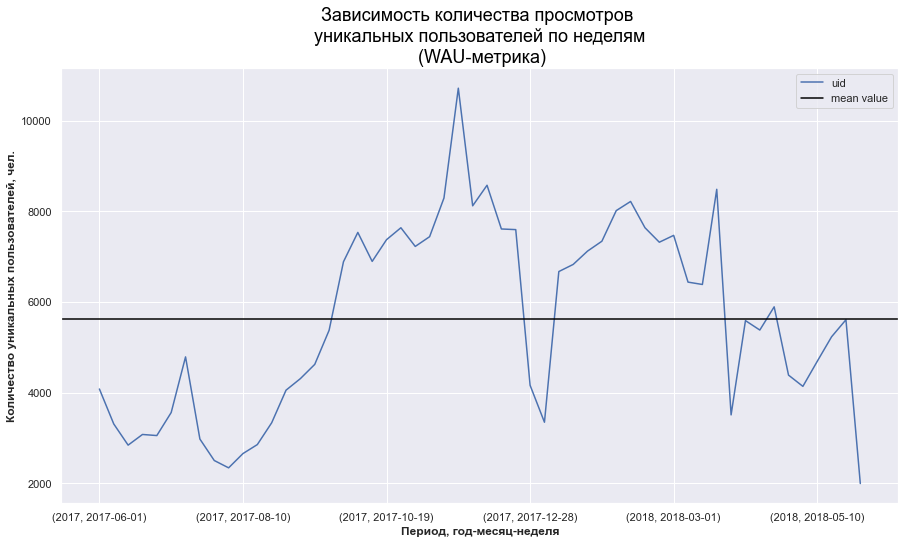

In [16]:
visits['session_week'] = visits['session_week'].dt.date
draw_plot(
    visits, 
    ['session_year', 'session_week'], 
    visits_wau_mean, 
    'Период, год-месяц-неделя', 
    'Количество уникальных пользователей, чел.', 
    'Зависимость количества просмотров \n уникальных пользователей по неделям \n (WAU-метрика)'
)

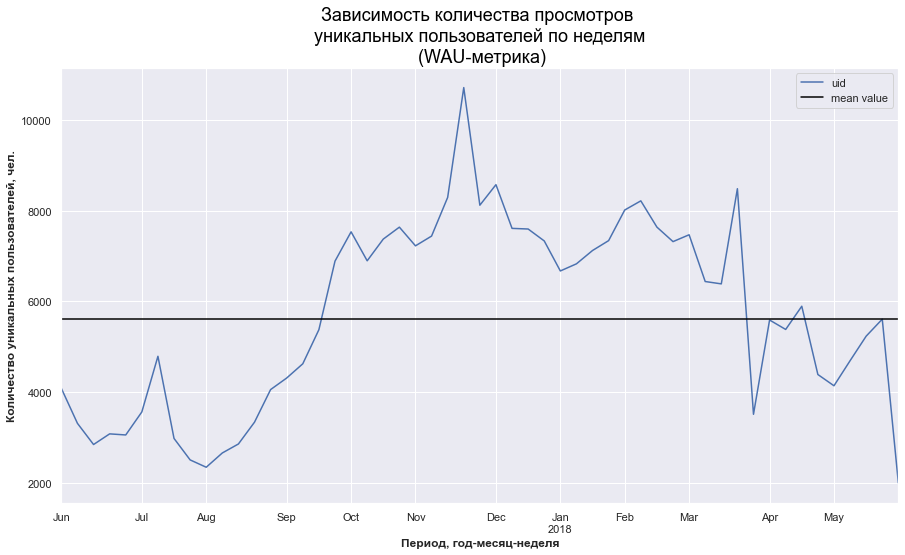

In [17]:
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
draw_plot(
    visits, 
    ['session_week'], 
    visits_wau_mean, 
    'Период, год-месяц-неделя', 
    'Количество уникальных пользователей, чел.', 
    'Зависимость количества просмотров \n уникальных пользователей по неделям \n (WAU-метрика)'
)

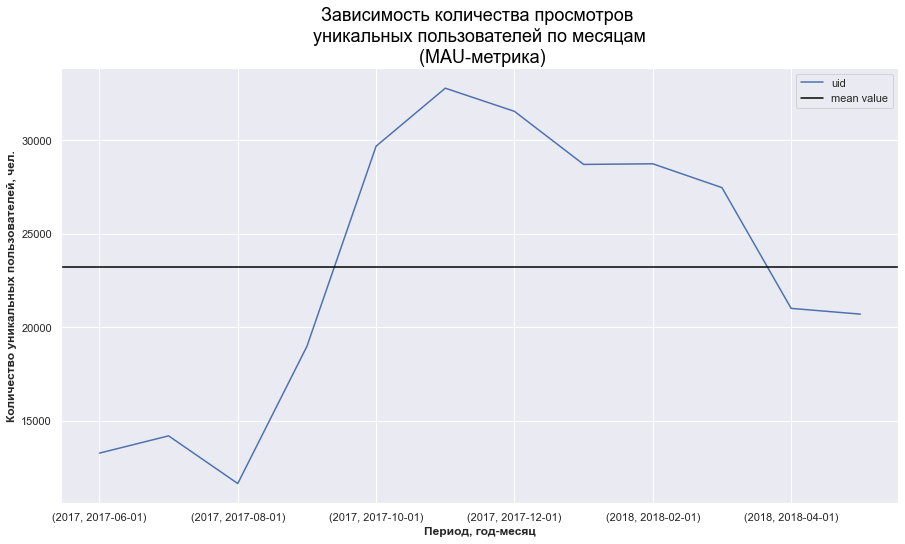

In [18]:
visits['session_month'] = visits['session_month'].dt.date
draw_plot(
    visits,
    ['session_year', 'session_month'], 
    visits_mau_mean, 
    'Период, год-месяц', 
    'Количество уникальных пользователей, чел.', 
    'Зависимость количества просмотров \n уникальных пользователей по месяцам \n (MAU-метрика)'
)

#### Выводы

Метрика DAU отлично отображает пики, по которым можно сказать, что `2017-11-24` был пик в **3319** просмотров, если посмотреть на календарь (можно его еще перевернуть и наступит снова 3 сентября) - то это день, как раз на который выпала так называемая "черная пятница" из-за чего люди стали просматривать все возможные мероприятия со скидками. Вот с `2018-03-31` не совсем понятно, почему был лишь **1** посетитель, возможно все внезапно уехали отмечать 1 апреля, а может был сбой и никто не мог воспользоваться сервисом.

Метрика WAU подсказывает нам, что в декабре все готовятся к новому году и походы на культурные мероприятия не очень интнересует, второй пик приходится как раз на странный показатель 1 посетитель за все время.

Метрика MAU показывает, что колиество уникальных просмотров в зимнее время увеличивается во много раз - на улице уже особо не погуляешь :(

Так же прослеживается сезонность - ближе к холодам и новогодним праздникам посещать закрытые мероприятия хочет больше людей, когда как летом - время моря и песка :) Еще влияет то, что большинство фильмов стараются запускать в период сентябрь-апрель, чтобы получить как можно больше зрителей, как раз когда все возвращаются с отдыха.

2.1.2. Определим среднее количество посещений в день пользователями

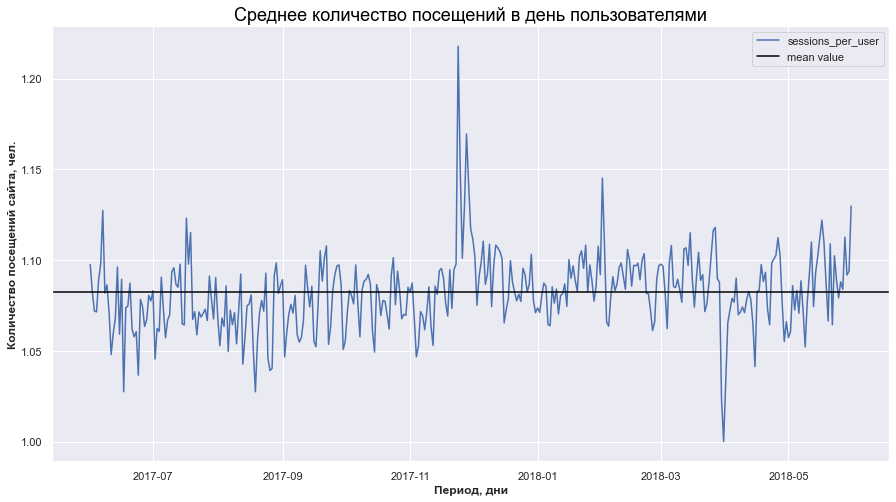

Среднее количество посещений в день пользователями за весь период:  1.08


In [19]:
sessions_per_user = visits.groupby('session_date').agg({'uid':['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

# отрисовка графика
draw_plot(sessions_per_user, 
          'sessions_per_user', 
          sessions_per_user['sessions_per_user'].mean(), 
          'Период, дни', 
          'Количество посещений сайта, чел.', 
          'Среднее количество посещений в день пользователями', 
          group = False
          )
print('Среднее количество посещений в день пользователями за весь период: ', round(sessions_per_user['sessions_per_user'].mean(), 2))

Локальные пики могли возникуть в связи с проведением концертов любимых групп, июнь-июль и февраль - почему-то любимое время проведения концертов.

2.1.3. Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период.

Найдем ASL (average session length) - посчитаем длину всех сессий и вычислим среднее:

Преждем чем считать длину сессий, проверим, нет ли ошибок в данных:

In [20]:
visits.query('(end_ts < start_ts)')

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,2018-03-01,2018-03-22,2018-03-25
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,2018-03-01,2018-03-22,2018-03-25


Интересно, у нас есть 2 записи, где разница сессий меньше 0, получается кто-то начал сессию позже, чем закончил! Вот они - путешественники во времени! Уберем их из данных.

In [21]:
visits = visits.query('(end_ts > start_ts)')

In [22]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['session_duration_sec'].mean())

714.1695158279873


Взглянем так же еще на распределение:

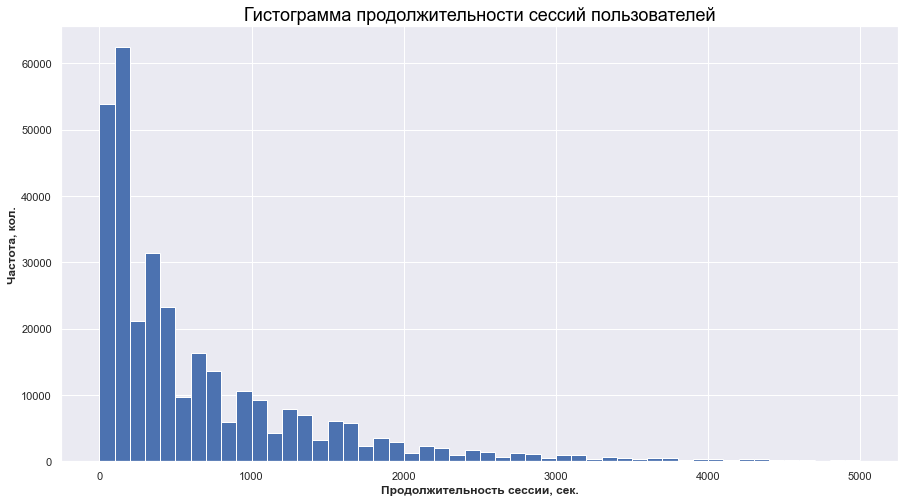

In [23]:
visits['session_duration_sec'].hist(bins=50, range=(0, 5000), figsize=(15,8))
plt.xlabel('Продолжительность сессии, сек.', fontweight='bold')
plt.ylabel('Частота, кол.', fontweight='bold')
plt.title('Гистограмма продолжительности сессий пользователей', fontsize=18, fontweight=0, color='black')
plt.show()

Получается, что у нас нет нормального распределения, в связи с этим, рассчитаем медиану, которая покажет, сколько в среднем пользователя проводят на сайте:

In [24]:
visits['session_duration_sec'].median()

360.0

Дополнительно рассчиает так же моду - сколько чаще всего проводят времени пользователи на сервисе:

In [25]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

2.1.4. Рассчитаем `Retention Rate`. В большинстве своем пользователи ходят на мероприятия минимум раз в месяц, поэтому рассчитаем RR в разрезе по месяцам. Выделим когорты согласно первому месяцу посещения:

In [26]:
first_visit_date = visits.groupby(['uid'])['start_ts'].min()

Переименуем Series в `firts_visit_date`, после чего объединим с исходным датафреймом:

In [27]:
first_visit_date.name = 'first_visit_date'

In [28]:
visits = visits.join(first_visit_date, on='uid')

Выделим из столбцов `first_visit_date` месяц. Вызовем метод astype() и преобразуем значения столбцов к типу `datetime64[M]`:

In [29]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

In [30]:
visits['visit_month'] = visits['session_date'].astype('datetime64[M]')

Найдём lifetime когорты. Из месяца совершения посещения `visit_month` вычтем месяц когорты `first_visit_month`:

In [31]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']


Получили столбец `cohort_lifetime` с типом timedelta. Преобразуем этот тип в число месяцев, прошедших между датами. Получим дробные числа, после чего округлим значения столбца `cohort_lifetime` методом `round()`, а затем приведём их к целочисленному типу методом `astype('int')`:

In [32]:
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
visits['cohort_lifetime'].head()

0    0
1    0
3    2
5    0
6    7
Name: cohort_lifetime, dtype: int32

Оставим в обозначении когорты только год и месяц. Применим метод `dt.strftime()` — он превращает объект Series с типом datetime в строку в формате даты.

In [33]:
visits['first_visit_month'] = visits['first_visit_month'].dt.strftime('%Y-%m')

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:

In [34]:
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждый следующий месяц.
Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:

In [35]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count

,first_visit_month,uid
0,2017-06,11885
12,2017-07,11825
23,2017-08,9214
33,2017-09,15125
42,2017-10,23538
50,2017-11,24852
57,2017-12,23030
63,2018-01,20573
68,2018-02,20173
72,2018-03,18793


Переименуем столбец `uid` в `cohort_users` методом rename(). 
Параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое:

In [36]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

Объединим данные по когортам с исходным количеством пользователей в когорте:

In [37]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 

Наконец, рассчитаем Retention Rate. Разделим количество активных пользователей в каждый месяц на исходное число пользователей в когорте:

In [38]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 

Построим сводную таблицу и создадим тепловую карту.
При построении, уберем столбец `lifetime = 0 месяц`, там одни 1.0, из-за чего тепловая карта получается не столь наглядной: 

In [39]:
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 

Добавим функцию `heatmap` для отрисовки тепловой карты:

In [40]:
def plot_heatmap(df, title, fmt='.1%', xlabel = 'Время жизни когорты', ylabel = 'Когорта', figsize = (13,9)):
    plt.figure(figsize=(13, 9))
    sns.heatmap(df, annot=True, fmt=fmt, linewidths=1, linecolor='gray'); 
    plt.title(title, fontsize=18, fontweight=0, color='black')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.show()

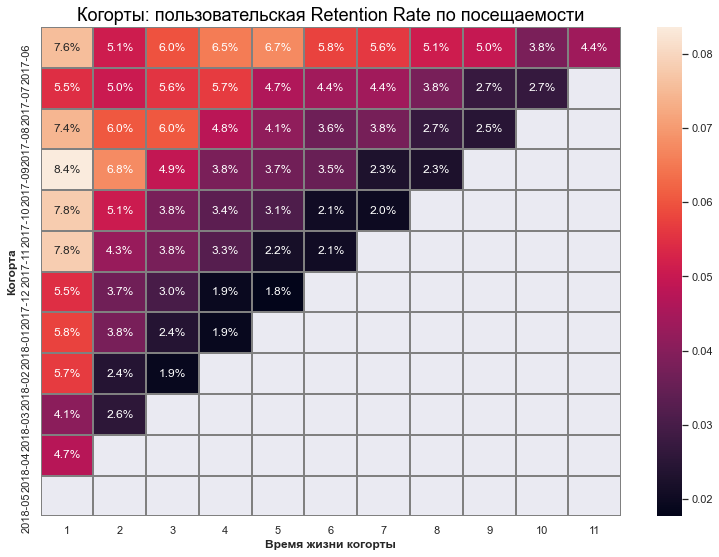

In [41]:
plot_heatmap(retention_pivot.iloc[:, 1:], 'Когорты: пользовательская Retention Rate по посещаемости')

In [42]:
print(f'Средний Retention Rate на второй месяц «жизни» когорт: {retention_pivot[1].mean(): .1%}') 

Средний Retention Rate на второй месяц «жизни» когорт:  6.4%


Выделим ТОП-3 перспективных когорты с учетом "срока-жизни" 6 месяцев:

In [43]:
retention_pivot.cumsum(axis=1)[5].sort_values(ascending=False)

first_visit_month
2017-06    1.319310
2017-08    1.284784
2017-09    1.275702
2017-07    1.263763
2017-10    1.231583
2017-11    1.213061
2017-12    1.158532
2018-01         NaN
2018-02         NaN
2018-03         NaN
2018-04         NaN
2018-05         NaN
Name: 5, dtype: float64

#### Выводы

Когорты `2017-06, 2017-08, 2017-09` - можно причислить к перспективным, их RR на 6 месяц жизни когорты является одним из наивысоких, когда как у когорт `2017-11, 2017-12` он самый низкий.

### 2.2. Метрики электронной коммерции

2.2.1. Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

Сгруппируем таблицу `visits` по `uid` и отобразим первое время посещения, также сгруппируем таблицу `orders` по `uid`, где найдем первый заказ - объединим эти агрегаты и рассчитаем разницу.

In [44]:
first_order_date = orders.groupby('uid')['buy_ts'].min()

In [45]:
visit_order_group = pd.merge(first_order_date, first_visit_date, on='uid').reset_index()

Переименуем столбец с датой первой покупки

In [46]:
visit_order_group = visit_order_group.rename(columns = {'buy_ts':'first_order_date'})

In [47]:
visit_order_group['first_visit_date'] = visit_order_group['first_visit_date'].astype('datetime64')

Проверим, что нет ли у нас случаев "купил раньше, чем зашел на сайт", для этого сравним время первой покупки и первого посещения:

In [48]:
visit_order_group.query('first_order_date < first_visit_date').count()

uid                 195
first_order_date    195
first_visit_date    195
dtype: int64

Целых 195! Ок, уберем их из таблицы:

In [49]:
visit_order_group = visit_order_group.query('first_order_date > first_visit_date')

Найдем среднее время между посещением и покупкой при помощи медианы:

In [50]:
visit_order_group['time_to_order'] = visit_order_group['first_order_date'] - visit_order_group['first_visit_date']
visit_order_group['time_to_order'] = (pd.to_timedelta(visit_order_group['time_to_order']) / np.timedelta64(1, 'D'))
print(f"Среднее время от посещения до продажи: {float(visit_order_group['time_to_order'].mean()):.0f} дней" )

Среднее время от посещения до продажи: 17 дней


In [51]:
print(f"Популярное время от посещения до продажи: {float(visit_order_group['time_to_order'].mode()):.0f} дней" )

Популярное время от посещения до продажи: 0 дней


#### Выводы

Во время исследования обнаружили ошибки в данных - некоторые пользователи оформили заказ раньше, чем посетили сайт, таких записей оказалось 195.

В целом от момента посещения до заказа в среднем нужно 17 дней, но чаще всего пользователи покупают билеты на мероприятия в тот же день, что зашли на ресурс.

Создадим функцию и построим гистограмму, также нанесем среднее значение (черная линия):

In [52]:
def draw_hist(data, column, meanline, xlabel, ylabel, title, bins = 150, range = (0, 20), figsize=(15,8)):
    data[column].plot(kind='hist', bins = bins, range = range, figsize=figsize)
    
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.title(title, fontsize=18, fontweight=0, color='black')
    plt.axvline(meanline, color = 'black', label = 'mean value')
    plt.legend()
    plt.show()

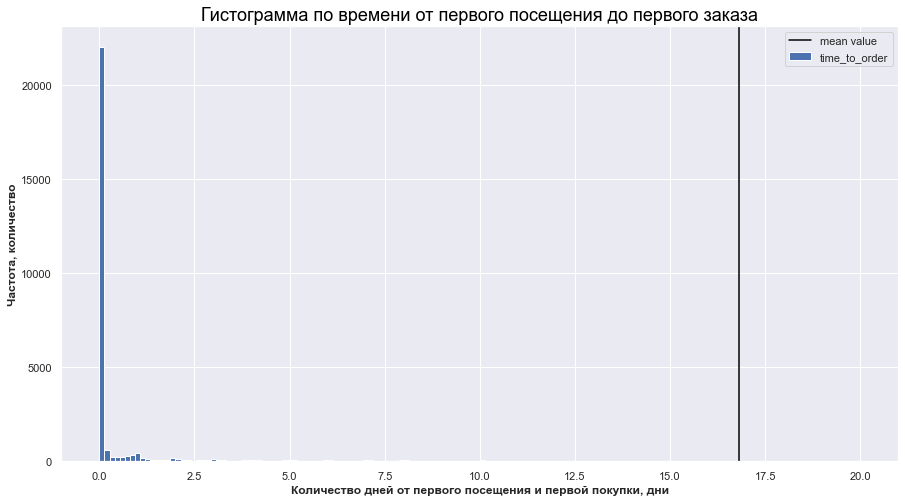

In [53]:
draw_hist(
    visit_order_group,
    'time_to_order',
    round(visit_order_group['time_to_order'].mean(), 1),
    'Количество дней от первого посещения и первой покупки, дни',
    'Частота, количество',
    'Гистограмма по времени от первого посещения до первого заказа'
)

2.2.2. Рассчитаем среднее количество покупок на одного пользователя за определенный период.

Найдем дату первого заказа для каждого пользователя:

In [54]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'


Присоеденим данные к общей таблице `orders` и выделим столбец `first_order_month`:

In [55]:
orders = orders.join(first_order_date, on='uid')

In [56]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

Найдём `lifetime` когорты. Из месяца совершения покупки `order_month` вычтем месяц когорты `first_order_month`. Преобразуем этот тип в число месяцев, прошедших между датами. Получим дробные числа, после чего округлим значения столбца `cohort_lifetime` методом `round()`, а затем приведём их к целочисленному типу методом `astype('int')`:

In [57]:
orders['cohort_lifetime'] = orders['order_month'] - orders['first_order_month']

orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

Оставим в обозначении когорты только год и месяц. Применим метод `dt.strftime()` — он превращает объект Series с типом datetime в строку в формате даты.

In [58]:
orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m')

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество покупок на определённый «месяц жизни»:

In [59]:
cohorts = orders.groupby(['first_order_month', 'cohort_lifetime']).agg({'revenue': 'count'}).reset_index()

In [60]:
cohort_sizes = (
    orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']

Объединим, полученные размер когорты и сами когорты:

In [61]:
report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')

Найдём среднее количество покупок `mean_buy_per_user` — разделим показатель `revenue` на `uid`, после чего построим сводную таблицу изменения количества покупок, где в столбцах будет lifetime, а строках — когорты:

In [62]:
report['mean_buy_per_user'] = (report['revenue'] / report['n_buyers'])

In [63]:
revenue_per_user_pivot = report.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='mean_buy_per_user',
    aggfunc='mean',
)

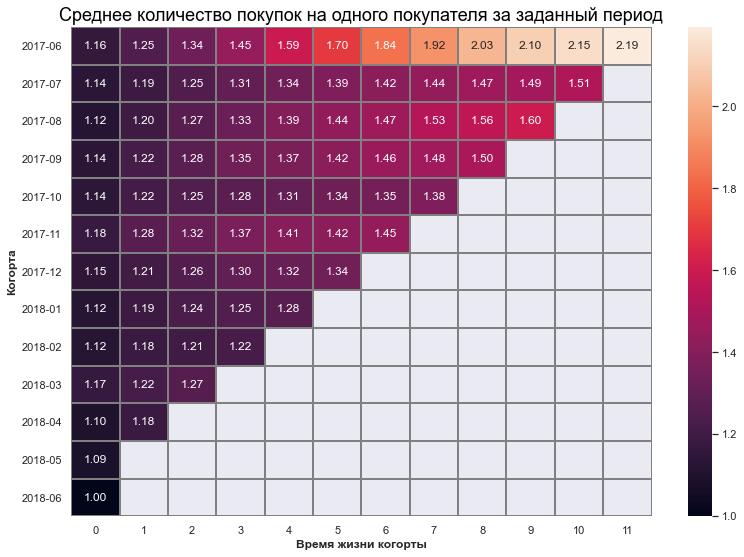

In [64]:
plot_heatmap(revenue_per_user_pivot.cumsum(axis=1), 'Среднее количество покупок на одного покупателя за заданный период', fmt='.2f')

Найдем среднее значение по всем когортам, существуеющим 6 месяцев:

In [65]:
revenue_per_user_pivot.cumsum(axis=1)[5].mean()

1.4341911542792218

2.2.3. Рассчитаем средний чек, применяя группировку по времени совершения покупки.

In [66]:
orders['order_date'] = orders['buy_ts'].astype('datetime64[D]')

In [67]:
mean_paycheck = orders.groupby('order_date')['revenue'].agg(['sum', 'count'])
mean_paycheck['mean_paycheck'] = mean_paycheck['sum'] / mean_paycheck['count']

Построим график, отражающий изменения метрики во времени:

Средний чек за весь период: 4.94


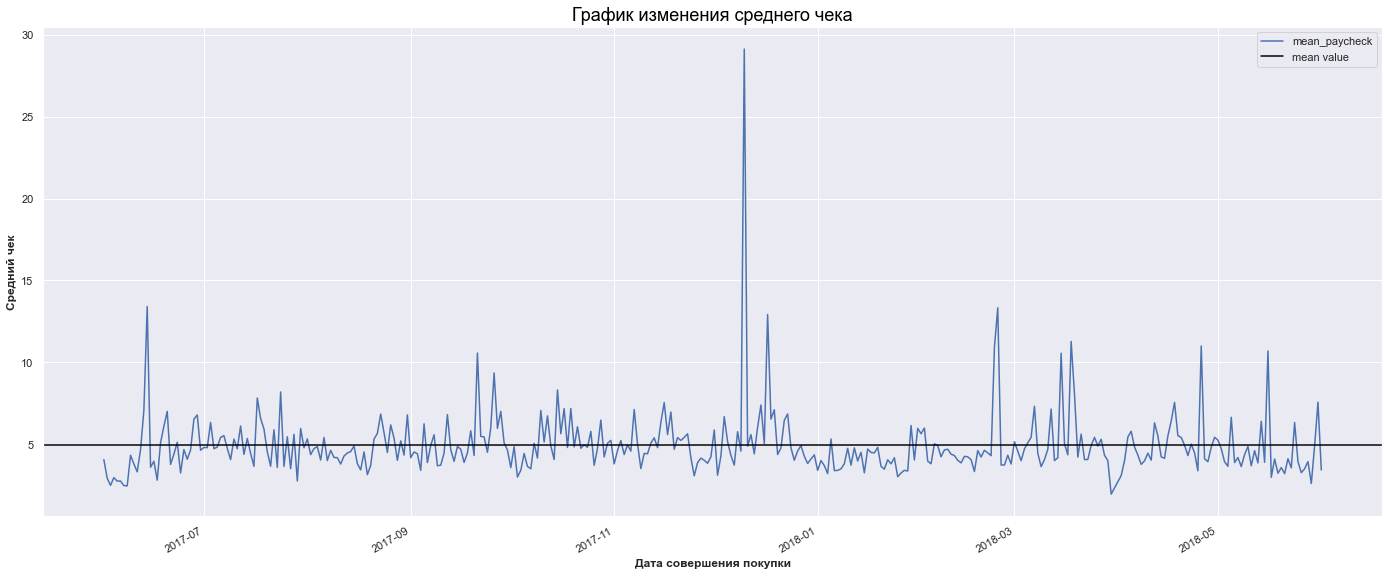

In [68]:
print(f"Средний чек за весь период: {mean_paycheck['mean_paycheck'].mean():.2f}")
draw_plot(
    mean_paycheck, 
    'mean_paycheck', 
    mean_paycheck['mean_paycheck'].mean(), 
    'Дата совершения покупки', 
    'Средний чек', 
    "График изменения среднего чека", 
    group=False,
    figsize=(24,10)
    )

#### Выводы

Средний чек пользователя составляет 5 у.е., а в моменты распродаж и крупных мероприятий достигает 12-28 у.е. 

Больше акций-мероприятий = больше покупок! 

2.2.4. Выясним, как меняется LTV на покупателя по когортам, рассчитаем средний LTV за 6 месяцев.

Для этого нам нужно:
1. найти дату первой покупки каждого покупателя
2. вычислить число новых покупателей за каждую дату
3. добавить дату первой покупки в таблицу с заказами
4. сгруппировать таблицу и посчитать выручку

In [69]:
costs['month'] = costs['dt'].astype('datetime64[M]')

Получим месяц первой покупки каждого покупателя:

In [70]:
first_orders_month = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_month.columns = ['uid', 'first_order_month']

Посчитаем количество новых покупателей `(n_buyers)` за каждый месяц:

In [71]:
cohort_sizes = (
    first_orders_month.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes['first_order_month'] = cohort_sizes['first_order_month'].dt.strftime('%Y-%m')

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом `reset_index()`:

In [72]:
cohorts = (
    orders.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

Добавим в таблицу `cohorts` данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [73]:
report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')

Найдем валую прибыль с учетом маржинальности:

In [74]:
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month'].astype('datetime64[M]')) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

Найдем LTV - разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте и построим сводную таблицу:

In [75]:
report['ltv'] = report['gp'] / report['n_buyers']

In [76]:
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

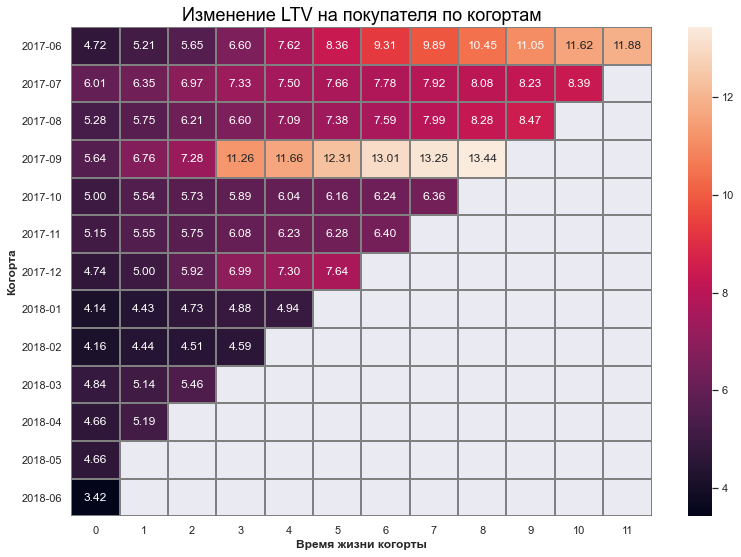

In [77]:
plot_heatmap(output.cumsum(axis=1), 'Изменение LTV на покупателя по когортам', fmt='.2f')

Обратим внимание на когорту 2018-06, откуда она появилась и сколько там людей?

In [78]:
report.query('first_order_month == "2018-06"')

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
78,2018-06,1,2018-06-01,3.42,3.42,0,3.42


Как видим когорта состоит из 1 покупателя, который успел сделать заказ 2018-06.

Рассчитаем средний LTV по когортам за 6 месяцев:

In [79]:
output.cumsum(axis=1)[5].mean()

7.969052630207335

#### Выводы

Самыми прибыльными можно назвать когорты `2017-06, 2017-09` к моменту наступления холодов - они совершают больше всего покупок, менее эффективными являются после новогодние когорты `2018-01, 2018-02`.

### 2.3 Маркетинговые метрики

2.3.1 Посчитаем общую сумму, затраченную на маркетинг и выясним, как распределены траты по источникам.

In [80]:
print(f"Общая сумма за весь период, затраченная на маркетинг: {costs['costs'].sum().round()}")

Общая сумма за весь период, затраченная на маркетинг: 329132.0


Отобразим на графике сумму трат на все источники по месяцам:

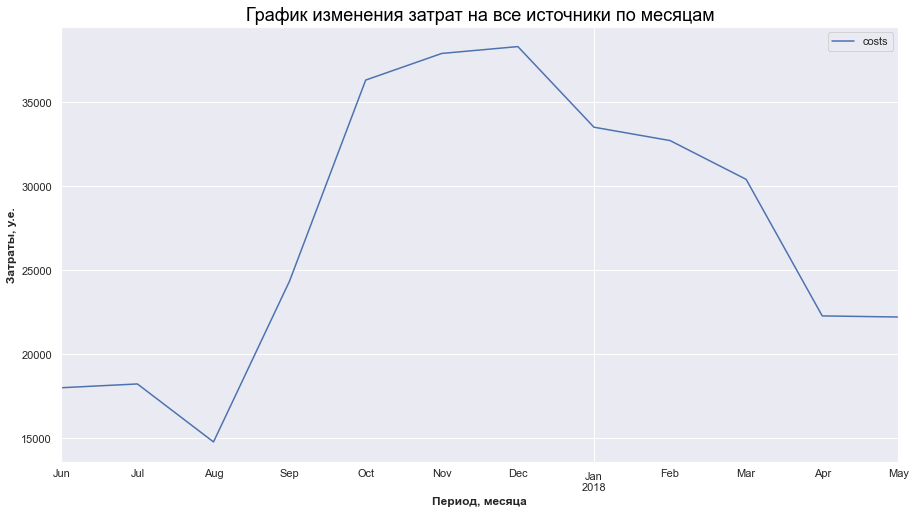

In [81]:
draw_plot(
    costs, 
    'month', 
    False, 
    'Период, месяца',
    "Затраты, у.е.",
    "График изменения затрат на все источники по месяцам",
    group = True,
    agg = {'costs':'sum'}   
)

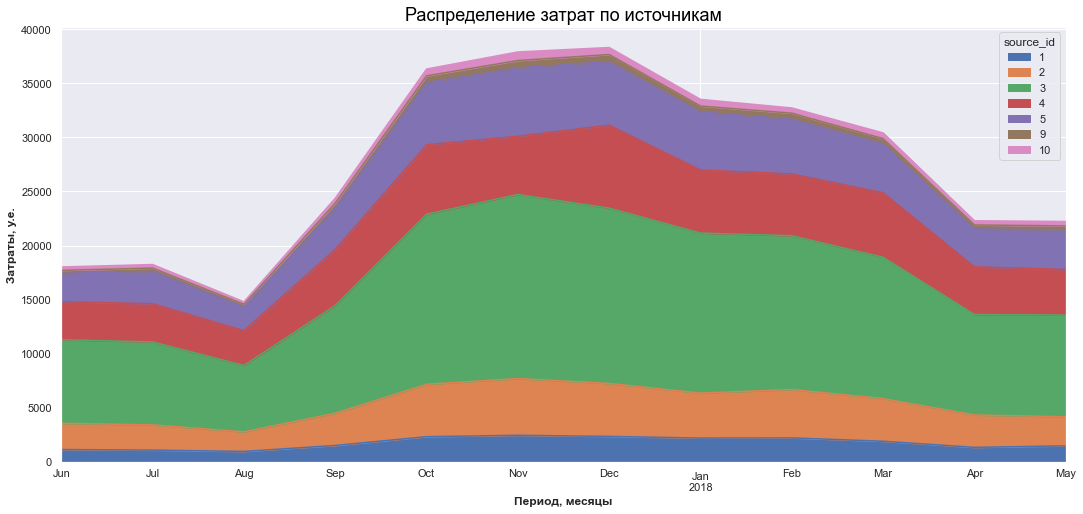

In [82]:
costs.pivot_table(
    index='month', 
    columns='source_id', 
    values='costs',
    aggfunc='sum'
).plot.area(figsize=(18,8))

plt.xlabel('Период, месяцы', fontweight='bold')
plt.ylabel('Затраты, у.е.', fontweight='bold')
plt.title('Распределение затрат по источникам', fontsize=18, fontweight=0, color='black')
plt.show()

#### Выводы

Самыми крупными по затрамам являются источники `1, 3, 4`, а в сезон холодов затраты досигают своего максимума. 

Клиенты после летнего отпуска дожны же узнать про мероприятия и акции!

2.3.2. Рассчитаем средний `CAC` на одного покупателя для всего проекта.

Найдем расходы за месяц:

In [83]:
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs['month'] = monthly_costs['month'].dt.strftime('%Y-%m')

In [84]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new = report_new.drop(['month'], axis='columns')

In [85]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

In [86]:
report_new['cac'].mean()

9.319905176921111

In [87]:
report_new

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,2017-06,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.00,8.905091
1,2017-06,2023,2017-07-01,981.82,981.82,1,0.485329,18015.00,8.905091
2,2017-06,2023,2017-08-01,885.34,885.34,2,0.437637,18015.00,8.905091
3,2017-06,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.00,8.905091
4,2017-06,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...
73,2018-03,3533,2018-04-01,1063.05,1063.05,1,0.300892,30415.27,8.608907
74,2018-03,3533,2018-05-01,1114.87,1114.87,2,0.315559,30415.27,8.608907
75,2018-04,2276,2018-04-01,10600.69,10600.69,0,4.657597,22289.38,9.793225
76,2018-04,2276,2018-05-01,1209.92,1209.92,1,0.531599,22289.38,9.793225


2.3.3. Рассчитаем `ROMI` по когортам в разрезе источников.

Вычислим первый источник для пользователя из данных `visits`:

In [88]:
first_source = visits.sort_values(by='start_ts').groupby('uid')['source_id'].first().reset_index()
first_source.columns = ['uid', 'first_source']

Соеденим данные с `orders`

In [89]:
orders = pd.merge(orders, first_source, on=['uid'])

Сгруппируем таблицу orders сначала по месяцу первой покупки + источнику и найдем количество людей в когортах, потом сгруппируем по первой покупке, текущему месяцу и источнику, посчитаем выручку:

In [90]:
orders_source = orders.groupby(['first_order_month', 'first_source']).agg({'uid':'nunique'})
orders_revenue = orders.groupby(['first_order_month', 'order_month', 'first_source']).agg({'revenue': 'sum'}).reset_index()

Объединим по месяцу первой покупки и источнику:

In [91]:
report = pd.merge(orders_revenue, orders_source, on = ['first_order_month', 'first_source']).reset_index()

In [92]:
report['ltv'] = (report['revenue'] * margin_rate) / report['uid']

In [93]:
costs_source = costs.groupby(['source_id', 'month']).agg({'costs':'sum'}).reset_index()
costs_source['month'] = costs_source['month'].dt.strftime('%Y-%m')

In [94]:
report = pd.merge(report, costs_source, left_on=['first_order_month', 'first_source'], right_on=['month', 'source_id'])

In [95]:
report = report.rename(columns={'uid':'n_byers'})

Найдем `CAC, ROMI` в разрезе по источникам:

In [96]:
report['cac'] = report['costs'] / report['n_byers']
report['romi'] = report['ltv'] / report['cac']

In [97]:
report['order_month'] = report['order_month'].dt.strftime('%Y-%m')

In [98]:
report = report.drop(['month'], axis='columns')

In [99]:
report['age'] = (report['order_month'].astype('datetime64[M]') - report['first_order_month'].astype('datetime64[M]')) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

Построим тепловую карту для ROMI в зависимости от источника:

In [100]:
def slice_source(df, metric, aggfunc = 'mean', column_source_id = 'source_id', sources = [1,2,3,4,5,9,10]):
    for source in sources:
        output = df[df[column_source_id] == source].pivot_table(
            index = 'first_order_month',
            columns = 'age',
            values = metric,
            aggfunc = 'mean'
        )
        
        plot_heatmap(output.cumsum(axis=1).round(2), f'{metric.upper()} для источника #{source}', fmt='.1%')

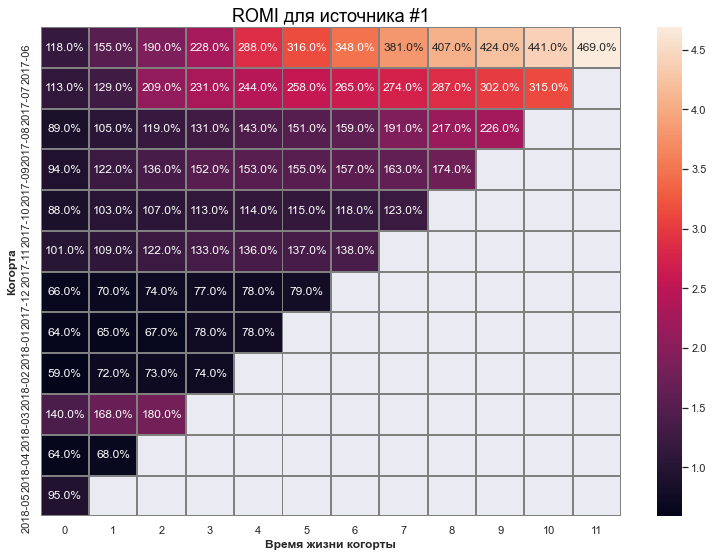

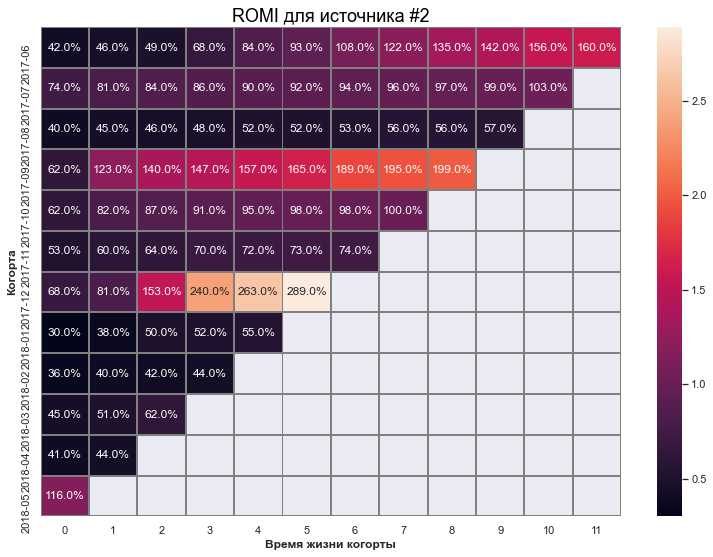

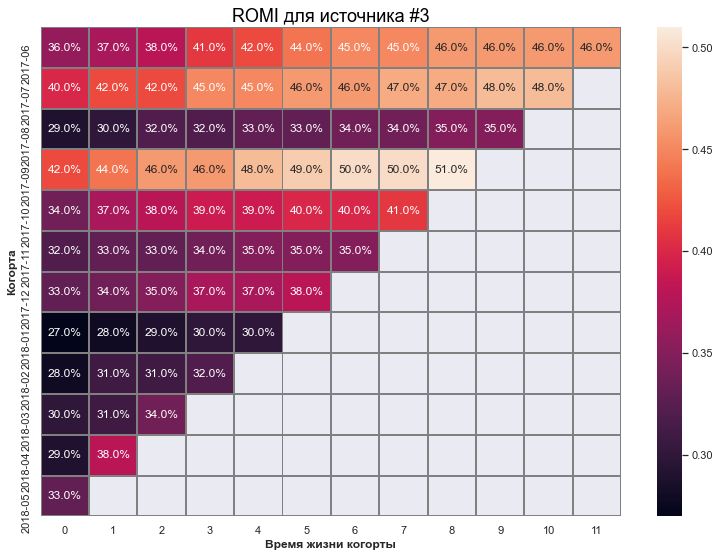

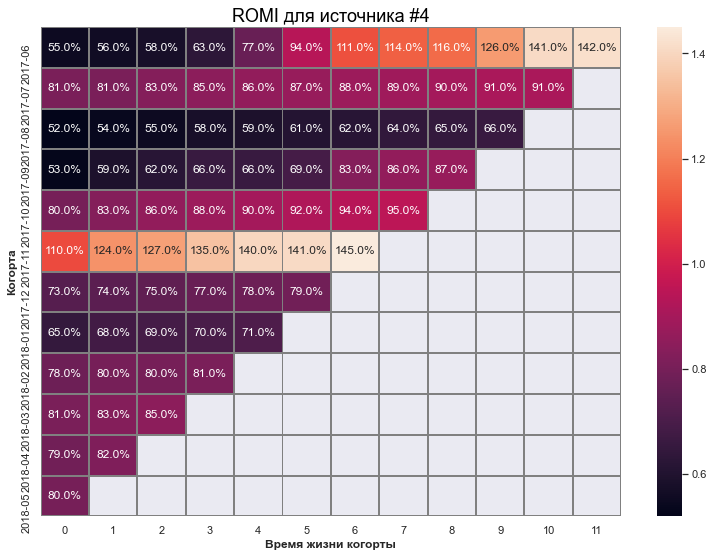

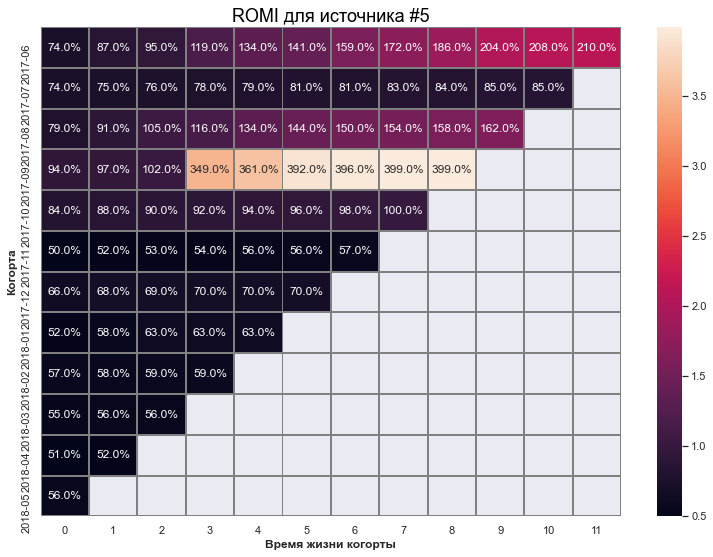

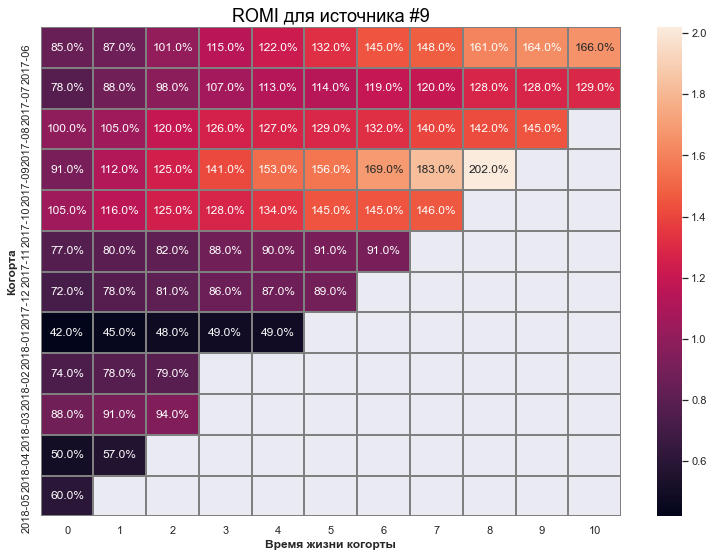

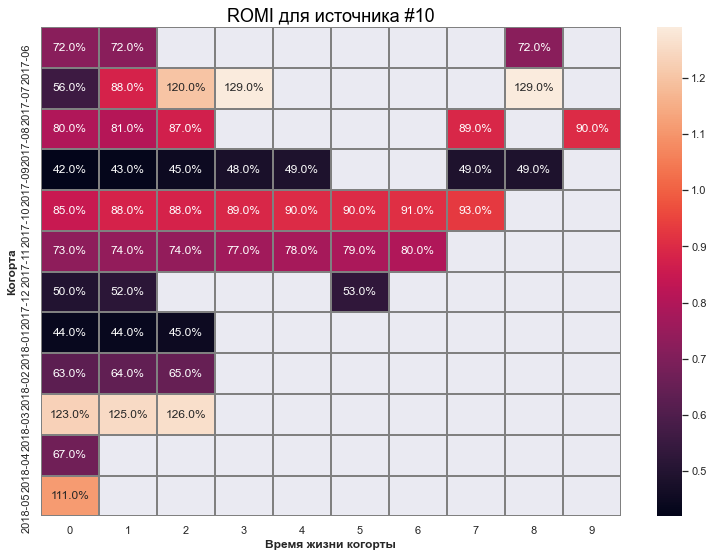

In [101]:
slice_source(report, 'romi')

Найдем средний CAC для каждого источника трафика: 

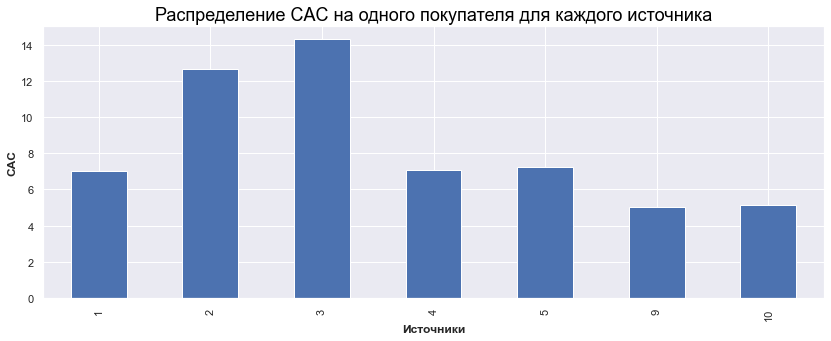

In [102]:
output = report.groupby('source_id')['cac'].mean().plot(kind='bar', figsize=(14,5))
plt.xlabel('Источники', fontweight='bold')
plt.ylabel('CAC', fontweight='bold')
plt.title('Распределение CAC на одного покупателя для каждого источника', fontsize=18, fontweight=0, color='black')
plt.show()

## 3. Общий вывод

### 3.1 Источники трафика, на которые стоит делать упор

Ориентируясь на метрику `ROMI` можно сказать, что маркетологам стоит делать упор на источниках - `1, 5, 9` - в них окупаемость происходит на 1-3 месяц существования когорты. Если еще посмотреть на график распределния затрат по источникам, то можно заметить, что траты на данные источники небольшие, по сравнению с остальными, а окупаемость намного выше.

### 3.2. Выводы по каждой из метрик

Среднее количество посещений в день пользователями за период наблюдений составляет **1.08**. 

Так же прослеживается сезонность - ближе к холодам и новогодним праздникам посещать закрытые мероприятия хочет больше людей, когда как летом - время моря и песка :) Еще влияет то, что большинство фильмов стараются запускать в период сентябрь-апрель, чтобы получить как можно больше зрителей, как раз когда все возвращаются с отдыха.

Пользователи в среднем проводят порядка **714** секунд на сайте, а их средний `Retention Rate` на второй месяц «жизни» когорт составляет **6.5%**.

В среднем проходит **17** дней с момента первого посещения сайта до совершения покупки, а спустя месяц - частота покупок падает в разы.

За 6 месяцев количество покупок на одного покупателя составляет около **13** - учитывая, что сюда входит кино, театры и все возможные лекции.

Средний чек пользователя составляет **4.94** у.е., а в моменты распродаж и крупных мероприятий достигает **12-28** у.е. 
Больше акций-мероприятий = больше покупок! 


Средний LTV, который приносит пользовать составляет **8.4** у.е., а наибольший прирост наблюдается у первой когорты `2017-06 и 2017-09`

Общая сумма расходов на маркетинг составляет **329132 у.е.**, расходы на одного посетителя составляют **9.3 у.е.**, на источниках 1, 5, 9 окупаемость происходит на 1-3 месяц существования когорты. 

Самыми крупными по затрамам являются источники `1, 3, 4`, а в сезон холодов затраты досигают своего максимума. 

### 3.3. Итоги когортного анализа

Самыми перспективными когортами для компании являются когорты `2017-06 и 2017-09`, которые имеют высокие показатели по RR, LTV и ROMI, а источник 1 является самым окупаемым, среди всех остальных, менее эффективными являются после новогодние когорты `2018-01, 2018-02`.